In [1]:
import xarray as xr
import geopandas as gpd
import pandas as pd
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# enter the right file name below. To browse over files of v2 reanalysis, check out 
# https://wci.earth2observe.eu/thredds/catalog-earth2observe-model-wrr2.html
# once you select a file, choose the OPeNDAP link and copy paste that below. The example below is WaterGAP model of Kassel, which
# proved to be one of the best performing models globally.
url = r'https://wci.earth2observe.eu/thredds/dodsC/univk/wrr2-monthly-agg.nc'

# Point shapefile provided below
fn = r'C:\Users\Okay Mert\Downloads\Mekong.shp'

# variable name inside the OPeNDAP dataset
var_name = 'RivOut'


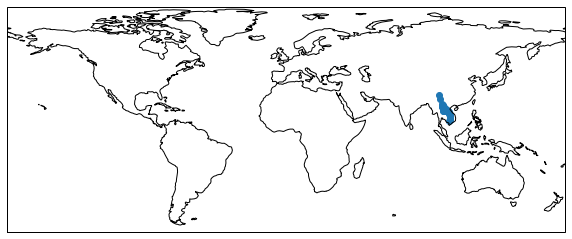

In [3]:
# first open shapefile and plot
f = plt.figure(figsize=(10, 15))
ax = plt.subplot(projection=ccrs.PlateCarree())
gdf = gpd.read_file(fn)
ax.coastlines()
gdf.plot(ax=ax, transform=ccrs.PlateCarree())
ax.set_extent([-180, 180, -60, 85])

In [4]:
gdf

,id,name,geometry
0,0,None,POINT (104.9752879112359 11.5470708383469)
1,1,None,POINT (105.4688605007835 11.9755686018459)
2,2,None,POINT (105.9999875264923 12.26580940724881)
3,3,None,POINT (105.9874693811052 13.20772085926176)
4,4,None,POINT (105.9713746227504 13.89443269206525)
5,5,None,POINT (105.856028854541 14.61372634674075)
6,6,None,POINT (105.6548443751058 15.28755202428502)
7,7,None,POINT (105.4107405400578 15.7902184473536)
8,8,None,POINT (105.0235721863004 16.18905327091771)
9,9,None,POINT (104.7387843787444 16.56908703174231)


In [5]:
# looks good, now we retrieve the xy coordinates in separate lists for later use
xs, ys = list(gdf.geometry.x.values), list(gdf.geometry.y.values)
print(ys)

[11.5470708383469, 11.975568601845904, 12.265809407248812, 13.207720859261755, 13.894432692065246, 14.613726346740746, 15.287552024285016, 15.790218447353597, 16.189053270917707, 16.569087031742306, 16.974457693623993, 17.39132774493914, 17.706340660266015, 18.1253561527819, 18.32791185075669, 18.43058550398012, 18.169114538554403, 17.97232841291136, 17.888957458223636, 17.9744547091478, 18.1232316806317, 18.09093653109315, 17.89236112227667, 18.02165188837153, 18.287589392380454, 18.51878497533075, 18.776337510079035, 19.118002334277893, 19.50490370433594, 19.846733174724747, 20.04593516887909, 19.82780855114178, 20.297825669366176, 20.895622325146363, 20.885718576138995, 21.446529157222177, 21.809523168109493, 22.496556046047225, 25.799522971427038, 28.458298695364732]


In [6]:
# now open the OPeNDAP link and plot one time slice just to see if everything works as expected
ds = xr.open_dataset(url)
ds

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 720, lon: 1440, time: 420)
Coordinates:
  * lon        (lon) float32 -179.875 -179.625 -179.375 ... 179.625 179.875
  * lat        (lat) float32 -89.875 -89.625 -89.375 ... 89.375 89.625 89.875
  * time       (time) datetime64[ns] 1980-01-16 1980-02-15 ... 2014-12-16
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    CanopInt   (time, lat, lon) float32 ...
    Evap       (time, lat, lon) float32 ...
    LAI        (time, lat, lon) float32 ...
    PotEvap    (time, lat, lon) float32 ...
    Precip     (time, lat, lon) float32 ...
    Qs         (time, lat, lon) float32 ...
    Qsb        (time, lat, lon) float32 ...
    Qsm        (time, lat, lon) float32 ...
    RivOut     (time, lat, lon) float32 ...
    RootMoist  (time, lat, lon) float32 ...
    Runoff     (time, lat, lon) float32 ...
    SWE        (time, lat, lon) float32 ...
    SnowFrac   (time, lat, lon) float32 ...
    SurfStor 

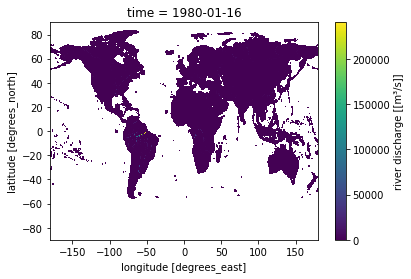

In [7]:
ds[var_name][0].plot()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: the `dim` argument to `concat` will be required in a future version of xarray; for now, setting it to the old default of 'concat_dim'
  """Entry point for launching an IPython kernel.


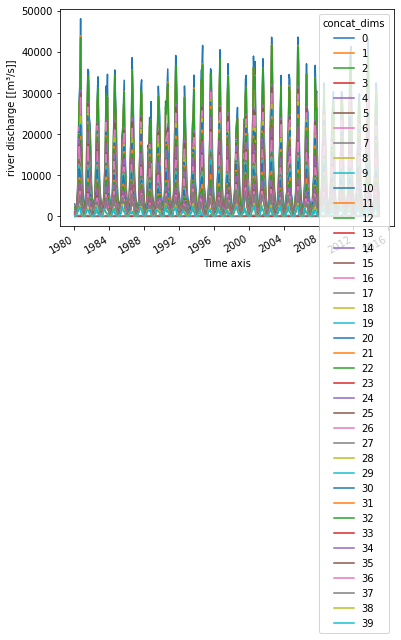

In [8]:
ds_sel = xr.concat([ds[var_name].sel(lon=x, lat=y, method='nearest') for x, y in zip(xs, ys)])
ds_sel.plot.line(x='time')

In [10]:
for n in range(len(ds_sel)):
    fn_out = 'timeseries_{:02d}.csv'.format(n + 1)
    df = ds_sel[n].drop(['lat', 'lon']).to_dataframe().rename(columns={'RivOut': 'flow_{:02d}'.format(0)})
    df.to_csv(fn_out)